# Pseudorandom number generation

Before continuing our discussion of theoretical aspects of probablity and statistics, it will be useful to have a basic understanding of how computers generate numbers that appear random. These random numbers are used as the basis for Monte Carlo simulation, which we will study in more depth later.

:::{margin}
Even a coin toss [may not be a truly random process](https://www.npr.org/templates/story/story.php?storyId=1697475). If we are able to perfectly control every aspect of the flip, it is possible to exert considerable control over which side comes up. In a sense, much of what humans think of as "random" is simply a lack of information about the process generating some outcome.
:::

Computers are deterministic: for any given input they always give the same output. As a result, they are incapable of generating truly random results. Only a physical process, like flipping a coin or rolling dice, can be thought of as truly random. Computers are capable, however, of generating sequences of numbers that *appear* random using specially designed algorithms. These numbers are called *pseudorandom*.

![Dilbert comic](https://www.random.org/analysis/dilbert.jpg)


In python, both the `numpy` and `scipy` modules provide methods for generating pseudorandom numbers. In this section, we briefly review each.

## Using numpy

In [1]:
import numpy as np

# Initialize random number generator
rng = np.random.default_rng()

The `.random` method returns a random number between zero and one.

In [2]:
rng.random()

0.2722404091618418

This is a random value. Every time you execute the code on your computer you will get a different value. (Unless you specify a seed, as we discuss below.) Every number is equally likely to be chosen. Since these numbers have a precision of 17 digits, there are $10^{17}$ possible outcomes, so any particular number is incredibly unlikely: in fact, the probability of choosing any particular number is almost zero.

The optional `size` argument controls the number of draws that are returned.

In [3]:
rng.random(8)

array([0.29991523, 0.3349694 , 0.47931751, 0.92760358, 0.11955616,
       0.32122506, 0.96370828, 0.14243041])

In [4]:
rng.random((3,5))

array([[0.28021173, 0.38794571, 0.12704401, 0.10107   , 0.81130356],
       [0.01959945, 0.34606736, 0.0769582 , 0.7491976 , 0.25249427],
       [0.95251656, 0.03844873, 0.28757088, 0.98436955, 0.30392169]])

There are several other methods provided for generating other random draws.

In [5]:
# draw integers from 0 to 9
rng.integers(10, size=5)

array([3, 6, 1, 1, 6])

In [5]:
# Choose from a list
rng.choice(['Bloomington', 'West Lafayette', 'Ann Arbor', 'East Lansing'], 2)

array(['Ann Arbor', 'West Lafayette'], dtype='<U14')

Suppose, for example, we want to simulate dealing cards from a standard deck of playing cards. We can create a deck like this...

In [6]:
cards = [str(r)+s
         for r in list(range(2,11)) + list('JQKA')
         for s in '♦♣♥♠'
        ]
cards = np.array(cards)
cards

array(['2♦', '2♣', '2♥', '2♠', '3♦', '3♣', '3♥', '3♠', '4♦', '4♣', '4♥',
       '4♠', '5♦', '5♣', '5♥', '5♠', '6♦', '6♣', '6♥', '6♠', '7♦', '7♣',
       '7♥', '7♠', '8♦', '8♣', '8♥', '8♠', '9♦', '9♣', '9♥', '9♠', '10♦',
       '10♣', '10♥', '10♠', 'J♦', 'J♣', 'J♥', 'J♠', 'Q♦', 'Q♣', 'Q♥',
       'Q♠', 'K♦', 'K♣', 'K♥', 'K♠', 'A♦', 'A♣', 'A♥', 'A♠'], dtype='<U3')

... and deal five cards like this:

In [7]:
rng.choice(cards, 5, replace=False)

array(['A♠', '6♦', '10♦', 'J♣', '8♥'], dtype='<U3')

As we've seen, mathematicians have developed many *[statistical distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions)* over the last several hundred years to describe all kinds of real-world phenomena. Numpy has many such distributions [built-in](https://numpy.org/doc/stable/reference/random/generator.html#distributions).

For example, we can simulate five flips of a fair coin by drawing from the Binomial distribution with parameters $n=1$ and $p=0.5$.

In [8]:
rng.binomial(n=1, p=0.5, size=5)

array([0, 1, 0, 1, 0])

Or, we can simulate the outcome of five people each flipping a coin ten times, and reporting how many times it comes up "Heads."

In [9]:
rng.binomial(n=10, p=0.5, size=5)

array([8, 6, 2, 7, 4])

Here, we draw 15 values from a standard normal distribution, $\N(0,1)$, in a $5\times 3$ matrix.

In [11]:
rng.standard_normal((5,3))

array([[ 1.0074774 , -0.24043306,  0.54127701],
       [-1.52090851,  2.06083085, -0.77401136],
       [ 2.26833543,  0.70128983, -0.93734897],
       [-0.5051262 , -0.58430164,  0.55165283],
       [ 0.39643324, -0.23362117, -1.90522709]])

If we make many such draws, the average should be quite close to the true mean of the distribution (in this case, zero), while the standard deviation should be quite close to its population value as well (in this case, one). Let's test this with 10,000 draws.

In [23]:
draws = rng.standard_normal(10000)

draws.mean(), draws.std()

(0.007898317668684292, 1.0042095510147375)

In [ ]:
rng.binomial(n=1, p=0.5, size=5)

To draw from a more general $\N(\mu,\sigma^2)$ distribution, we use the `.normal` method. Here, we use $\mu=3$ and $\sigma=2$. (Note that the function takes the argument $\sigma$, not $\sigma^2$.)


In [24]:
draws2 = rng.normal(3, 2, 10000)
draws2.mean(), draws2.std()

(2.9948733251975352, 2.0256021430035487)

Here is a histogram of the simulated values. Not surprisingly, it follows the typical shape of a normal distribution, although with some random noise.

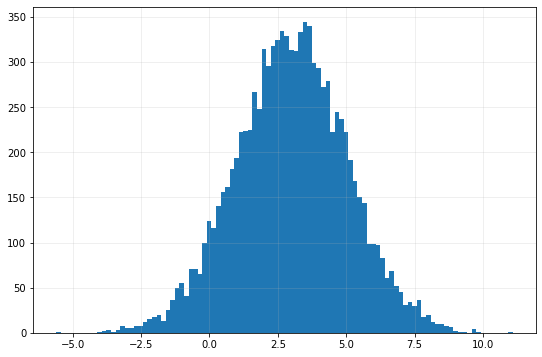

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,6))
ax.hist(draws2, bins=100)
ax.grid(alpha=0.25)
plt.show()

## Specifying a seed

Algorithms to generate pseudorandom numbers use a *seed* as a starting point to generate the next number in the sequence. As each random number is generated, the *state* of the algorithm changes, allowing it to generate new random draws. We can think of the pseudorandom number generator as creating an infinite series of numbers, and by providing a seed we choose where in the series to begin.

If we don't provide a seed to the algorithm, the current time is used to generate one. However, if we want to generate a stream of *reproducable* random numbers, we can specify a seed, which will allow us to get the *same* random numbers again.

In [15]:
# providing a seed as an argument
rng = np.random.default_rng(8675309)

# random draws
rng.standard_normal((5,3))

array([[-0.03940941,  0.70927967, -0.00996881],
       [ 0.57052593, -0.32324939,  2.16436963],
       [ 1.62858142,  0.03537361, -0.59590844],
       [ 1.42716144,  1.95400359,  1.69854378],
       [ 0.11976012, -0.98484949,  0.13702581]])

If we now provide the *same* seed again, we'll get the *same* random draws.

In [16]:
rng = np.random.default_rng(8675309)

rng.standard_normal((5,3))

array([[-0.03940941,  0.70927967, -0.00996881],
       [ 0.57052593, -0.32324939,  2.16436963],
       [ 1.62858142,  0.03537361, -0.59590844],
       [ 1.42716144,  1.95400359,  1.69854378],
       [ 0.11976012, -0.98484949,  0.13702581]])

## Using scipy

Many statistical functions are also available in the [SciPy library](https://docs.scipy.org/doc/scipy/reference/stats.html).

In [17]:
import scipy.stats as scs

Here we use `norm` to denote the normal distribution, and call the `.rvs` method to draw random variables.

In [18]:
scs.norm(5,10).rvs(size=(5,3))

array([[-1.83064963,  8.06838996,  6.10302284],
       [ 6.88877481, -4.75868285,  8.66985348],
       [16.75196457, 10.15082607, -0.58490908],
       [11.39957428, -8.94790264,  3.24041018],
       [15.58851126, 24.19032862, -8.59790901]])

We can specify a state as follows. Even though we're working in `scipy`, we specify the state of the random number generator within `numpy`. The two modules work very closely with each other.

In [19]:
rng = np.random.RandomState(8675309)

scs.norm(0,1).rvs(size=(5,3), random_state=rng)

array([[ 0.58902366,  0.73311856, -1.1621888 ],
       [-0.55681601, -0.77248843, -0.16822143],
       [-0.41650391, -1.37843129,  0.74925588],
       [ 0.17888446,  0.69401121, -1.9780535 ],
       [-0.83381434,  0.56437344,  0.31201299]])

In [20]:
# reset seed, verify that draws are the same
rng = np.random.RandomState(8675309)

scs.norm(0,1).rvs(size=(5,3), random_state=rng)

array([[ 0.58902366,  0.73311856, -1.1621888 ],
       [-0.55681601, -0.77248843, -0.16822143],
       [-0.41650391, -1.37843129,  0.74925588],
       [ 0.17888446,  0.69401121, -1.9780535 ],
       [-0.83381434,  0.56437344,  0.31201299]])